In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

import os
import json
import random
from random import choice

# random.seed(0)

In [2]:
green = "\033[42;1m"
blue = "\033[44;1m"
red = "\033[41;1m"
yellow = "\033[43;1m"
right = "\033[0m"

In [3]:
def show_img(img_path):
    if os.path.exists(img_path): 
        img = imread(img_path)

        fig = plt.figure()
        fig.set_dpi(100)
        
        plt.imshow(img)
        plt.axis('off')
        plt.show()

## Ours (test)

In [4]:
split = "test"
label = "chameleon_chatgpt"

result_file = f"../../results/scienceqa/{label}_{split}_cache.jsonl"

data_root = "../../data/scienceqa"

pid_splits = json.load(open(os.path.join(data_root, "pid_splits.json")))
examples = json.load(open(os.path.join(data_root, "problems.json")))
ocrs = json.load(open(os.path.join(data_root, "ocrs.json")))

results = []
with open(result_file, 'r') as f:
    for line in f:
        try:
            data = json.loads(line)
            results.append(data)
        except:
            pass
        
random.shuffle(results)
# results
# results[0]

------------------------------------
[Pid]
4347

[Question_Text]
In this experiment, which were part of a control group?

Context: The passage below describes an experiment.

Jessica was using steel to make rusted sculptures. After building each sculpture, she caused it to rust by placing it in salt water for eight hours. Jessica wondered if steel would rust faster if she added vinegar to the salt water.
Jessica cut ten squares of steel sheet metal. She put five of the squares into a tub filled with salt water. She put the other five squares into a tub filled with salt water mixed with vinegar. Once an hour for eight hours, Jessica counted how many steel squares in each group had rust on them.
Figure: a sculpture made from rusted steel.

Options: (A) the steel squares soaked in salt water (B) the steel squares soaked in salt water and vinegar

[Metadata]
{'pid': '4347', 'has_image': True, 'grade': 7, 'subject': 'natural science', 'topic': 'science-and-engineering-practices', 'category'

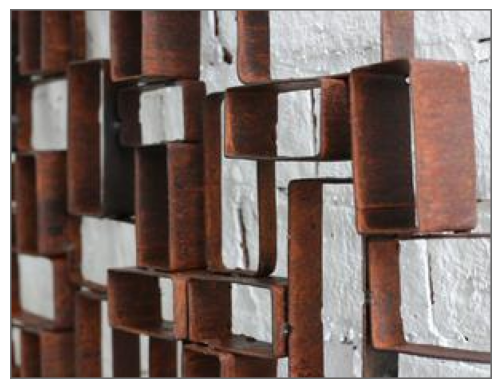

[Knowledge]
- In an experiment, a control group is a group that is used as a standard of comparison. The control group is not exposed to the experimental treatment or variable being tested.
- The experimental group is the group that is exposed to the experimental treatment or variable being tested.
- In this experiment, the control group would be the group of steel squares soaked in salt water, as they are not exposed to the vinegar variable being tested. The experimental group would be the group of steel squares soaked in salt water and vinegar, as they are exposed to the vinegar variable being tested.

[Solution]
Identify the groups of steel squares in the experiment.
There are two groups of steel squares: one group soaked in salt water and the other group soaked in salt water mixed with vinegar.
Identify the purpose of the experiment.
The purpose of the experiment is to determine if steel would rust faster if vinegar is added to the salt water.
Identify the variable being tested.
Th

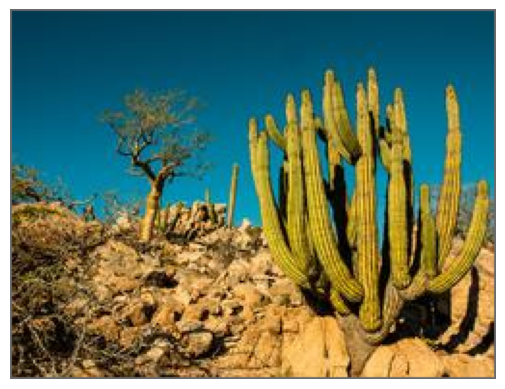

[Knowledge]
- Weather refers to the atmospheric conditions at a specific place and time, such as temperature, precipitation, wind, and humidity.
- Climate refers to the long-term patterns of weather in a particular region, including average temperature, precipitation, and other weather-related factors.
- Weather can change rapidly and is affected by short-term factors such as air pressure, wind, and moisture. Climate, on the other hand, changes slowly over time and is influenced by long-term factors such as the amount of sunlight, ocean currents, and the composition of the atmosphere.

[Solution]
The passage describes a specific event at a certain time and place, which is the absence of rain in Baja California during the first week of February. This is an example of weather, as it refers to the atmospheric conditions at a specific place and time. Therefore, the answer is A.

[Answer]
weather

[Prediction]
weather

------------------------------------
[Pid]
6686

[Question_Text]
Think a

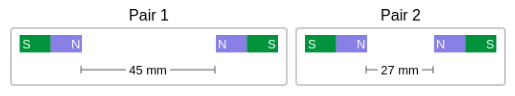

[Knowledge]
- Magnets can pull or push on each other without touching. When magnets attract, they pull together. When magnets repel, they push apart. These pulls and pushes between magnets are called magnetic forces.
- The strength of a force is called its magnitude. The greater the magnitude of the magnetic force between two magnets, the more strongly the magnets attract or repel each other.
- The magnitude of the magnetic force between two magnets depends on several factors, including the strength of the magnets, the distance between them, and the orientation of their poles.

[Text]
[([123, 0], 'Pair L'), ([385, 0], 'Pair 2'), ([123, 57], '45 mm'), ([387, 57], '27 mm')]

[Solution]
Compare the strength of the magnetic force between the magnets in each pair. Select the statement that correctly describes the strength of the magnetic force.
All the magnets are made of the same material, so the strength of the magnets is the same.
The distance between the magnets in Pair 1 is greater tha

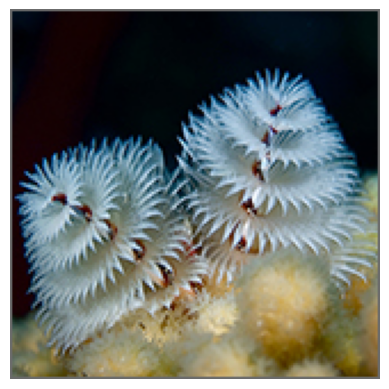

[Knowledge]
- Organisms are classified into different groups based on their characteristics. The classification system includes domains, kingdoms, phyla, classes, orders, families, genera, and species.
- The scientific name of an organism consists of two parts: the genus name and the species name. The genus name is capitalized, and the species name is not. 
- Organisms in the same species have similar characteristics and can interbreed to produce fertile offspring.

[Solution]
The Christmas tree worm's scientific name is Spirobranchus giganteus. To find the organism in the same species, we need to look for another organism with the same species name, which is "giganteus".
Sphodromantis viridis and Macropus giganteus are not in the same species as Spirobranchus giganteus because they have different species names.
Spirobranchus giganteus has the same species name as itself, but we are looking for a different organism.
Therefore, the organism in the same species as the Christmas tree worm

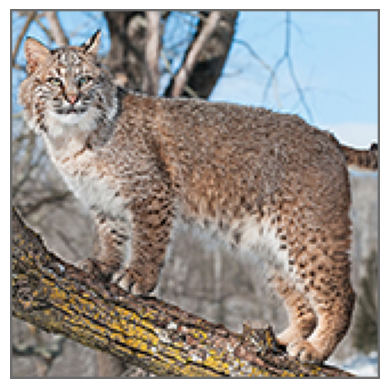

[Knowledge]
- Organisms are classified into different groups based on their characteristics. The classification system includes seven levels: kingdom, phylum, class, order, family, genus, and species.
- The genus is a level of classification that comes after family and before species. Organisms in the same genus share many characteristics and are closely related.
- The scientific name of an organism includes its genus and species names. The genus name is always capitalized and the species name is not.

[Solution]
The bobcat's scientific name is Lynx rufus. To find the organism in the same genus as the bobcat, look for another organism with the same genus name, Lynx.
A. Lynx canadensis - This organism has the same genus name, Lynx, as the bobcat. It could be a possible answer.
B. Python molurus - This organism is a type of snake and is not closely related to the bobcat.
C. Macropus rufus - This organism is a type of kangaroo and is not closely related to the bobcat.
Therefore, the answe

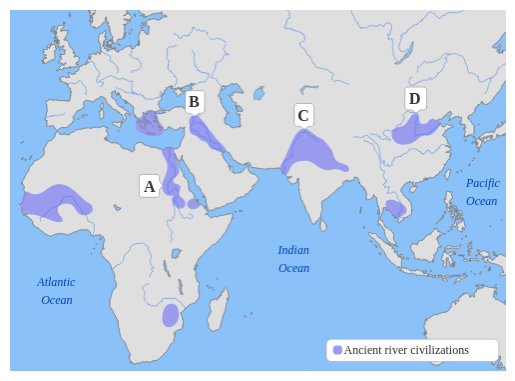

[Text]
[([457, 169], 'Pacific'), ([457, 187], 'Ocean'), ([267, 235], 'Indian'), ([269, 253], 'Ocean'), ([25, 267], 'Atlantic'), ([333, 335], 'Ancient river civilizations'), ([31.35981560033552, 284.23177872040264], 'Occan')]

[Solution]
Look at the map of early river civilizations. Find the location of ancient Egypt on the map. 
Ancient Egypt is located in the northeast corner of Africa, along the Nile River. 
The letter that marks ancient Egypt on the map is D. 

Therefore, the answer is D.

[Answer]
A

[Prediction]
A

------------------------------------
[Pid]
16505

[Question_Text]
Which animal is also adapted to be camouflaged in the snow?

Context: es live in the cold Arctic tundra. The  is adapted to be camouflaged in the snow.
Figure: Arctic fox.

Options: (A) camel (B) short-tailed weasel

[Metadata]
{'pid': '16505', 'has_image': True, 'grade': 5, 'subject': 'natural science', 'topic': 'biology', 'category': 'Adaptations', 'skill': 'Animal adaptations: skins and body coverings'

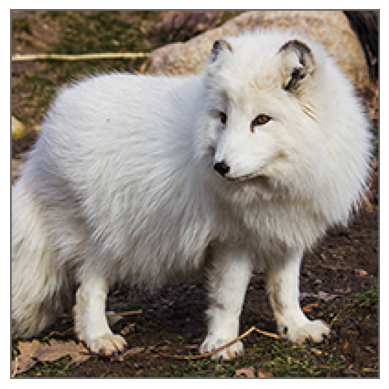

[Knowledge]
- The question is about an animal that is adapted to be camouflaged in the snow.
- The context mentions that the animal lives in the cold Arctic tundra.
- Camouflage is a type of adaptation that helps animals blend in with their surroundings to avoid predators or sneak up on prey.
- Animals that live in snowy environments may have adaptations such as white fur or feathers to blend in with the snow.
- The two options given are a camel and a short-tailed weasel, but it is already stated in the context that the animal in question is an Arctic fox.

[Solution]
The animal in question is an Arctic fox, as stated in the context.
To answer the question, we need to identify another animal that is adapted to be camouflaged in the snow.
Camouflage is a type of adaptation that helps animals blend in with their surroundings to avoid predators or sneak up on prey.
Animals that live in snowy environments may have adaptations such as white fur or feathers to blend in with the snow.
A camel

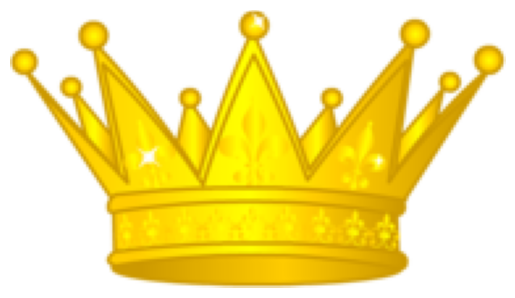

[Knowledge]
- Matter can exist in three states: solid, liquid, or gas.
- Solids have a fixed shape and volume, while liquids have a fixed volume but take the shape of their container, and gases have neither a fixed shape nor volume.
- A crown is a physical object typically made of metal, and metals are typically solids at room temperature. However, the state of matter of a crown may depend on its temperature and other conditions.

[Solution]
Determine the state of matter of a crown based on its properties.
A crown is a physical object typically made of metal. Metals are typically solids at room temperature.
Therefore, a crown is most likely a solid.
The answer is A.

[Answer]
a solid

[Prediction]
a solid

------------------------------------
[Pid]
7933

[Question_Text]
Compare the average kinetic energies of the particles in each sample. Which sample has the higher temperature?

Context: The diagrams below show two pure samples of gas in identical closed, rigid containers. Each colore

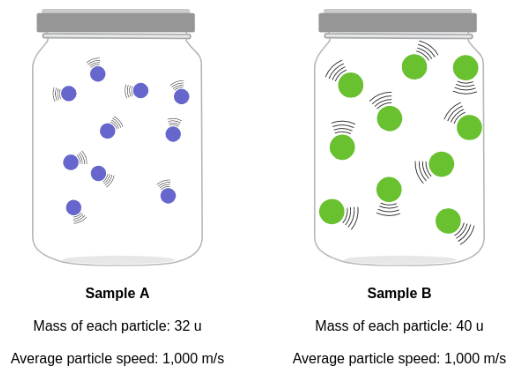

[Knowledge]
- The temperature of a substance is related to the average kinetic energy of the particles in the substance. 
- The higher the average kinetic energy of the particles, the higher the temperature of the substance.
- The kinetic energy of a particle is determined by its mass and speed. 
- For a pure substance, the greater the mass of each particle in the substance and the higher the average speed of the particles, the higher their average kinetic energy.

[Text]
[([83, 313], 'Sample A'), ([403, 313], 'Sample B'), ([24, 348], 'Mass of each particle: 32 U'), ([344, 346], 'Mass of each particle: 40 u'), ([0, 387], 'Average particle speed:'), ([183, 387], '000 mls'), ([320, 387], 'Average particle speed:'), ([505, 387], '000 mls')]

[Solution]
Compare the average kinetic energies of the particles in each sample. The average kinetic energy of a particle is determined by its mass and speed.
Sample A has particles with a mass of 32 u and an average speed of 000 mls.
Sample B has par

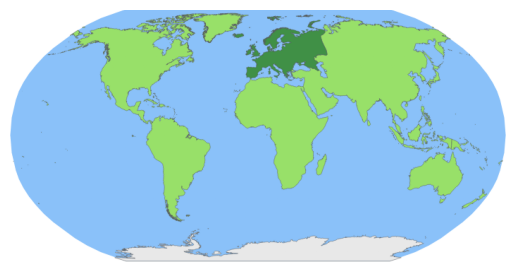

[Solution]
Look at the image and identify the continent that is highlighted. The continent is located in the upper left corner of the image and is colored in green. It is connected to Asia and separated from North America by the Arctic Ocean. The continent is Europe.

Therefore, the answer is A.

[Answer]
Europe

[Prediction]
Europe



In [5]:
count = 0
for result in results:
    
    # data
    pid = result["pid"]
    data = examples[pid]
    
    question = data["question"]
    choices = data["choices"]
    answer = choices[data["answer"]]
    hint = data["hint"]
    lecture = data["lecture"]
    grade = int(data["grade"].replace("grade", ""))
    has_image = True if data["image"] else False
   

    # result
    pid = result["pid"]
    question_text = result["question_text"]
    true_false = result["true_false"]
    prediction = result["prediction"]
    modules = result["modules:output"]
    
    metadata = {"pid": pid,
            "has_image": has_image,
            "grade": grade,
            "subject": data["subject"],
            "topic": data["topic"],
            "category": data["category"],
            "skill": data["skill"]
    }
                
    if true_false and has_image :
        print("------------------------------------")
            
        print(f"{blue}[Pid]{right}\n{pid}\n")
        #print(f"{blue}[Question]{right}\n{question}\n")
        print(f"{blue}[Question_Text]{right}\n{question_text}\n")
        print(f"{blue}[Metadata]{right}\n{metadata}\n")
        print(f"{yellow}[Modules]{right}\n{modules}\n")
        
        print("[Metadata]", metadata, '\n')
            
        if data["image"]:
            image_path = f"../../data/scienceqa/images/{split}/{pid}/image.png"
            show_img(image_path)

        if "bing_search:output" in result:
            bing_search = result["bing_search:output"]
        else:
            bing_search = None

        if "knowledge_retrieval:output" in result:
            knowledge = result["knowledge_retrieval:output"]
        else:
            knowledge = None

        if "text_detector:output" in result:
            texts = result["text_detector:output"]
            texts = [(text[0][0], text[1]) for text in texts]
        else:
            texts = None

        if "image_captioner:output" in result:
            caption = result["image_captioner:output"]
        else:
            caption = None
            
        if "solution_generator:output" in result:
            solution = result["solution_generator:output"]
        else:
            solution = None

        if knowledge:
             print(f"{yellow}[Knowledge]{right}\n{knowledge}\n")

        if texts:
             print(f"{yellow}[Text]{right}\n{texts}\n")

        if bing_search:
             print(f"{yellow}[Bing Search]{right}\n{bing_search}\n")

        if caption:
             print(f"{yellow}[Caption]{right}\n{caption}\n")

        if solution:
             print(f"{yellow}[Solution]{right}\n{solution}\n")

        print(f"{green}[Answer]{right}\n{answer}\n")
        print(f"{red}[Prediction]{right}\n{prediction}\n")

        count += 1
        if count >= 10:
            break